<a href="https://colab.research.google.com/github/jingyue-nancy-gao/Summer-Microcredential/blob/main/In_Class_Lab_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the Problem

###In this notebook, I will conduct a detailed and conclusive analysis to the given dataset to classify the class of iris based on sepal length, sepal width, petal length, and petal width.

# Task 2: Load the Libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Task 3: Load the Data

In [279]:
dataset = pd.read_csv('/content/drive/MyDrive/CUNY - MicroCredential/Week 3/iris.csv')

# Task 4: EDA (Explortory Data Analysis)

In [36]:
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
dataset.isnull()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [9]:
dataset.isnull().value_counts()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
False         False        False         False        False    150
dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
dataset.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

In [40]:
dataset['Class'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

# Task 5: Data Visualization

Figure #1: Class Distribution

To have a direct reflection of distribution of each class.

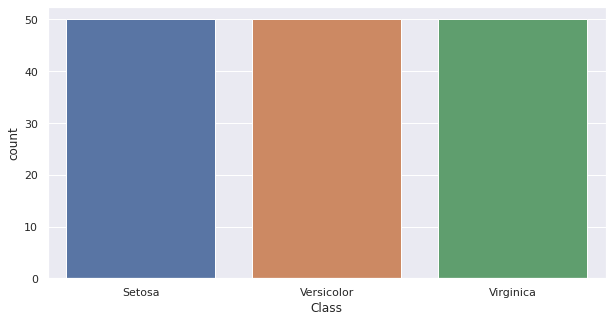

In [108]:
plt.figure(figsize = (10,5))
sns.countplot(x ='Class', data = dataset)

Figure #2: Features Distribution

To have a direct reflection and comparision of distribution of 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width' based on differnt classes.

<Figure size 1080x720 with 0 Axes>

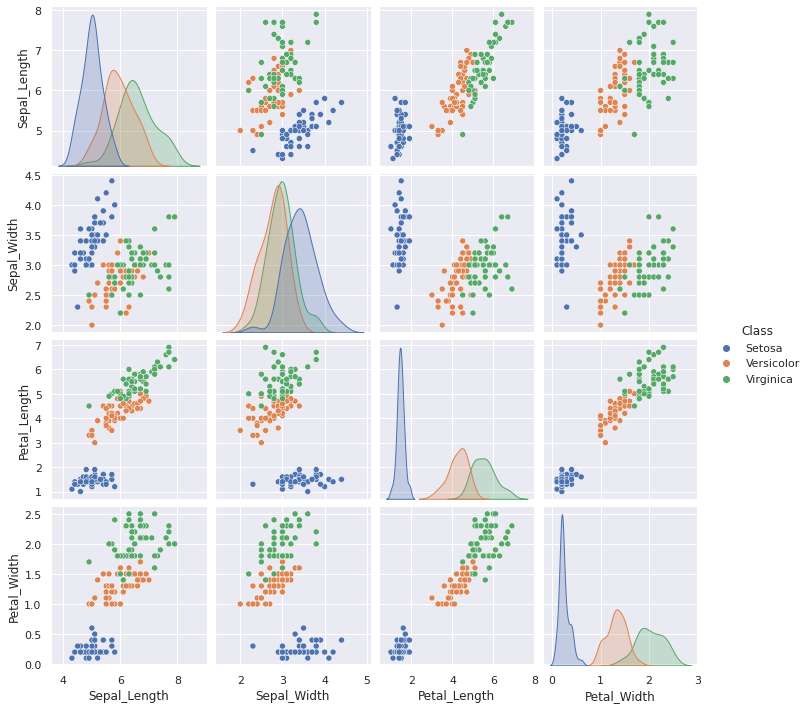

In [104]:
plt.figure(figsize = (15,15))
sns.pairplot(dataset, hue = 'Class')

Figure #3: Sepal Length and Sepal Width v.s. Classes 

To have a direct reflection and comparision of relationship between sepal length as well as sepal width and three different classes: Setosa, Versicolor, and Virginica.

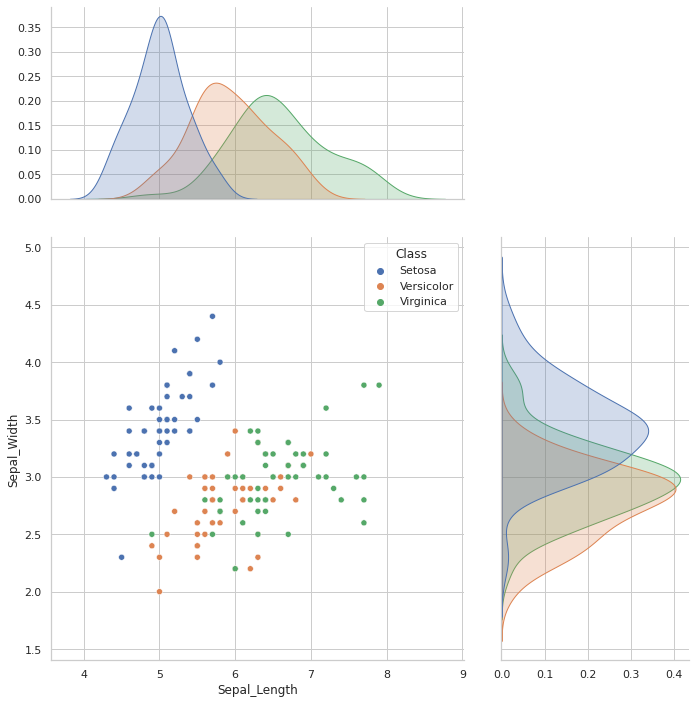

In [128]:
sns.jointplot(data=dataset, x="Sepal_Length", y="Sepal_Width", hue="Class",height=10, ratio = 2, marginal_ticks=True)

Figure #4: Petal Length and Petal Width v.s. Classes

To have a direct reflection and comparision of relationship between petal length as well as petal width and three different classes: Setosa, Versicolor, and Virginica.

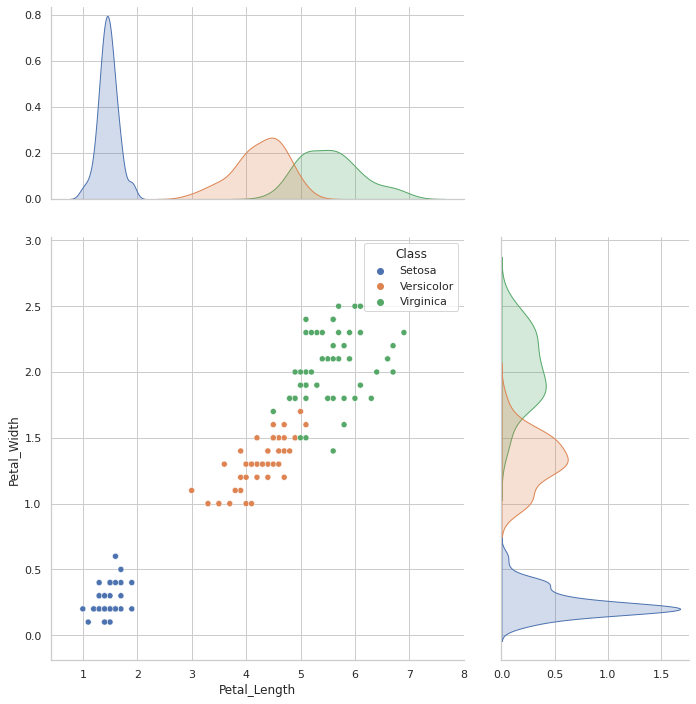

In [129]:
sns.jointplot(data=dataset, x="Petal_Length", y="Petal_Width", hue="Class",height=10, ratio = 2, marginal_ticks=True)

Figure #5: Correlation between the Features

To identify which feature would decide the type of iris.

In [280]:
dataset['Class'] = dataset['Class'].replace(['Setosa'],'1')
dataset['Class'] = dataset['Class'].replace(['Versicolor'],'2')
dataset['Class'] = dataset['Class'].replace(['Virginica'],'3')

In [281]:
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Text(0.5, 1.0, 'Correlation on iris Classes')

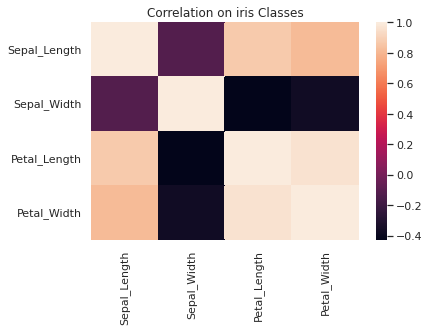

In [282]:
plt.figure(1)
sns.heatmap(dataset.corr())
plt.title('Correlation on iris Classes')

From above figure, I noticed that 'Sepal_Width' have higher correlation with 'Class.' Therefore, I will use sepal width to conduct linear regression. 

# Task 6: Train,Test Split

In [283]:
from sklearn.preprocessing import StandardScaler

In [284]:
scaler = StandardScaler()

In [285]:
scaler.fit(dataset.drop('Class',axis=1))

StandardScaler()

In [286]:
scaled_features = scaler.transform(dataset.drop('Class', axis = 1))

In [287]:
scaled_features

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [288]:
dataset_feat = pd.DataFrame(scaled_features, columns=dataset.columns[:-1])
dataset_feat.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [289]:
from sklearn.model_selection import train_test_split

In [290]:
X_train, X_test, y_train, y_test = train_test_split(dataset_feat, dataset['Class'], test_size = 0.33)

# Task 7: Conduct Logistic Regression

# Task 8: Conduct KNN Analytic




In [291]:
from sklearn.neighbors import KNeighborsClassifier

In [292]:
knn = KNeighborsClassifier(n_neighbors=1)

In [293]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [294]:
pred = knn.predict(X_test)

In [295]:
from sklearn.metrics import classification_report, confusion_matrix

In [296]:
print(confusion_matrix(y_test, pred))

[[18  0  0]
 [ 0 16  2]
 [ 0  0 14]]


In [297]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.89      0.94        18
           3       0.88      1.00      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [298]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.00 %
Standard Deviation: 4.58 %


In [299]:
error_rate = []

#will take some time

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

In [300]:
error_rate

[0.04,
 0.04,
 0.04,
 0.06,
 0.04,
 0.06,
 0.04,
 0.06,
 0.04,
 0.04,
 0.04,
 0.02,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.02,
 0.04,
 0.06,
 0.06,
 0.06,
 0.08,
 0.08,
 0.08,
 0.06,
 0.06,
 0.06,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.1,
 0.1,
 0.08,
 0.08,
 0.08,
 0.1]

Text(0, 0.5, 'Error Rate')

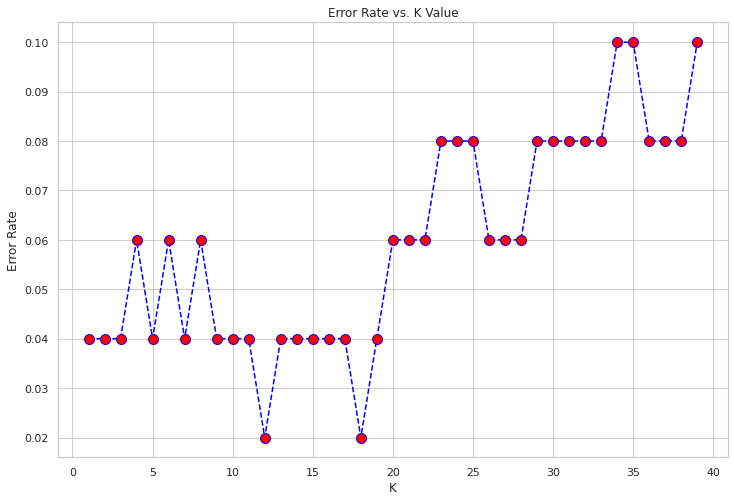

In [301]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title ('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Task 9: Making Predictions

In [302]:
knn = KNeighborsClassifier(n_neighbors=12)

In [303]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [304]:
print('With K = 12')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

With K = 12
[[18  0  0]
 [ 0 17  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.94      0.97        18
           3       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [305]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.00 %
Standard Deviation: 4.58 %


In [306]:
knn = KNeighborsClassifier(n_neighbors = 18)

In [307]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [308]:
print('With K = 18')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

With K = 18
[[18  0  0]
 [ 0 17  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.94      0.97        18
           3       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [309]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.00 %
Standard Deviation: 4.58 %


## Task 10: Conduct SVM model


In [260]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [266]:
from sklearn.svm import SVC

In [267]:
classifier = SVC(kernel = 'linear', random_state = 0)

In [268]:
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [269]:
y_pred = classifier.predict(X_test)

In [270]:
from sklearn.metrics import confusion_matrix

In [272]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [277]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.18 %
Standard Deviation: 3.64 %
